Importing python packages

In [48]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [49]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

Importing the master Form A dataset (variables extracted for main GUSTO cohort and IVF cohort)

In [50]:
file = '/home/mukkesh/Manuscript1_final/FormA392_20191206.xlsx'
df = pd.read_excel(file, index_col = "SubjectID")

Inspecting the dataset

In [51]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                        float64
bw_percentile_Lancet2011                                    float64
size_at_birth_Lancet2011                                     object
LGA_Lancet2011_bin                                          float64
children_at_home                                             object
working_situation                                            object
childcare_arr_1                                              object
childcare_arr_1_specify                                      object
childcare_arr_1_recoded                                      object
childcare_arr_2                                              object
childcare_arr_2_specify                                      object
childcare_arr_2_recoded                                      object
childcare_arr_3                                              object
childcare_arr_3_specify                                      object
childcare_arr_3_recoded                         

In [52]:
df.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04002                 -0.28                     39.05   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04010                 -0.77                     22.08   
010-04011                 -0.30                     38.33   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04002                      AGA                 0.0              NaN   
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04010                      AGA                 0.0              NaN   
010-04011                      AGA                 0.0              NaN   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04002               NaN             NaN                     NaN   
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04010               NaN             NaN                     NaN   
010-04011               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04002                     NaN                         8.0   
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04010                     NaN                         9.0   
010-04011                     NaN                         7.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04002                  0_no                           0.0            NaN   
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04010                 1_yes                           1.0          1_yes   
010-04011                 1_yes                           1.0           0_no   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04002     no_contraception                           NaN   
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04010                  NaN                           NaN   
010-04011                  NaN                           NaN   

          con

Removing subjects who self-reported Type 2 Diabetes (T2D) at pregnancy week 11

In [53]:
df.drop(['010-20008', '010-20191', '010-20224'], inplace=True)

Removing Subject ID 010-21272 (mother is of other ethnicity, Mother is Indian Muslim (IC says Indian race and Malay dialect) and genetic PCA positions her in between Malay and Indian cluster

In [54]:
df.drop(['010-21272'], inplace=True)

In [55]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                 1174
bw_percentile_Lancet2011                             1174
size_at_birth_Lancet2011                             1174
LGA_Lancet2011_bin                                   1174
children_at_home                                     1340
working_situation                                     705
childcare_arr_1                                       435
childcare_arr_1_specify                                32
childcare_arr_1_recoded                               435
childcare_arr_2                                       435
childcare_arr_2_specify                                41
childcare_arr_2_recoded                               435
childcare_arr_3                                       435
childcare_arr_3_specify                                14
childcare_arr_3_recoded                               435
number_weeks_been_pregnant                           1192
was_pregnancy_planned                                1204
was_pregnancy_

GDM status in GUSTO original dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [56]:
df['m_gdm_who_1999'].value_counts(dropna=False)

No     939
NaN    298
Yes    223
Name: m_gdm_who_1999, dtype: int64

Calculating the prevalence of GDM (%) in original dataset

In [57]:
(223/(939+223))*100

19.19104991394148

Plotting the distribution of gestational age when antenatal OGTT was performed

/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


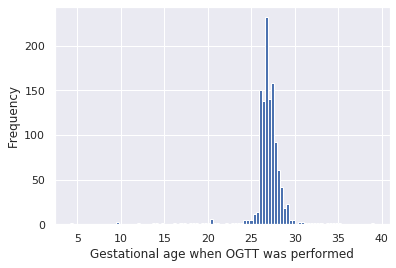

In [58]:
plt.hist(df['m_ogtt_gestationalweek'], 100)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga', dpi=100)
plt.show()

In [59]:
df['m_ogtt_gestationalweek'].describe()

count    1162.000000
mean       26.833029
std         2.129868
min         4.140000
25%        26.430000
50%        26.860000
75%        27.570000
max        39.140000
Name: m_ogtt_gestationalweek, dtype: float64

In [60]:
df_24wks = df[df['m_ogtt_gestationalweek'] < 24]
print(df_24wks.shape)

(36, 1557)


In [61]:
df_29wksogtt = df[df['m_ogtt_gestationalweek'] >= 29]
print(df_29wksogtt.shape)

(54, 1557)


Removing subjects who are less than 24 weeks or more than 29 weeks of gestational age when OGTT was performed

In [62]:
df = df.drop(df[(df.m_ogtt_gestationalweek < 24)].index)
df = df.drop(df[(df.m_ogtt_gestationalweek >= 29)].index)

In [63]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 16.3+ MB


bw_zscore_Lancet2011                                 1088
bw_percentile_Lancet2011                             1088
size_at_birth_Lancet2011                             1088
LGA_Lancet2011_bin                                   1088
children_at_home                                     1258
working_situation                                     658
childcare_arr_1                                       406
childcare_arr_1_specify                                31
childcare_arr_1_recoded                               406
childcare_arr_2                                       406
childcare_arr_2_specify                                38
childcare_arr_2_recoded                               406
childcare_arr_3                                       406
childcare_arr_3_specify                                13
childcare_arr_3_recoded                               406
number_weeks_been_pregnant                           1107
was_pregnancy_planned                                1116
was_pregnancy_

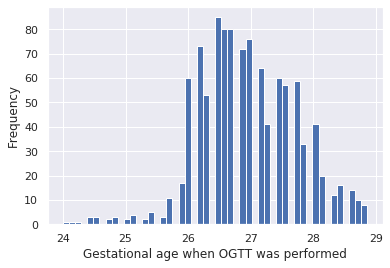

In [64]:
plt.hist(df['m_ogtt_gestationalweek'], 50)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga_2428', dpi=100)
plt.show()

In [65]:
df['m_ogtt_gestationalweek'].describe()

count    1072.000000
mean       26.938293
std         0.784757
min        24.000000
25%        26.430000
50%        26.860000
75%        27.570000
max        28.860000
Name: m_ogtt_gestationalweek, dtype: float64

In [66]:
df.rename(columns=
          {'PAI-1': 'PAI1', 'MCP-1': 'MCP1', 'IGF-I': 'IGFI', 'IGF-II': 'IGFII', 'IGFBP-1': 'IGFBP1', 'IGFBP-3': 'IGFBP3', 'IGFBP-7': 'IGFBP7', 'C-Peptide': 'CPeptide', 'IGFBP-4': 'IGFBP4'}, inplace=True)

Importing scikit-learn machine learning packages and modules

In [67]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statistics import mean, stdev
from sklearn.externals import joblib

Multiethnic model (Chinese, Malay, Indian)

In [68]:
df1=df.dropna(subset=['map_est_first_antenatal', 'mother_age_recruitment', 'pw11_any_gdm_outcome_cat', 'm_ethnicity_malay_bin', 'm_height_pw26', 'Adiponectin', 'IGFI', 'm_HEI_dairy_pw26', 'm_HEI_total_grains&_tubers_pw26', 'm_gdm_who_1999_cat'])


In [69]:
df1.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04020                  0.34                     63.40   
010-04022                  0.63                     73.61   
010-04023                  2.08                     98.12   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04020                      AGA                 0.0             0_no   
010-04022                      AGA                 0.0            1_yes   
010-04023                      LGA                 1.0             0_no   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04020               NaN             NaN                     NaN   
010-04022         stay_home             NaN                     NaN   
010-04023               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04020                     NaN                         5.0   
010-04022                     NaN                         6.0   
010-04023                     NaN                         2.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04020                  0_no                           0.0            NaN   
010-04022                 1_yes                           1.0           0_no   
010-04023                 1_yes                           1.0          1_yes   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04020     no_contraception                           NaN   
010-04022                  NaN                           NaN   
010-04023                  NaN                           NaN   

          con

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 10.8+ MB


Drop rows of pandas dataframe whose value is NaN 

In [71]:
df2 = df1[['ppBMI_WHO_obesity_bin', 'family_history_DM_binary_pw11', 'pw11_any_gdm_outcome_cat', 'pw11_history_macrosomia_cat', 'm_ethnicity_indian_bin', 'm_gdm_who_1999_cat']]


In [72]:
df2.head()

,ppBMI_WHO_obesity_bin,family_history_DM_binary_pw11,pw11_any_gdm_outcome_cat,pw11_history_macrosomia_cat,m_ethnicity_indian_bin,m_gdm_who_1999_cat
SubjectID,,,,,,
010-04004,0.0,1.0,0.0,0.0,0.0,0.0
010-04006,NaN,0.0,0.0,0.0,1.0,0.0
010-04020,0.0,0.0,0.0,0.0,0.0,0.0
010-04022,0.0,1.0,0.0,0.0,1.0,1.0
010-04023,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Data columns (total 6 columns):
ppBMI_WHO_obesity_bin            857 non-null float64
family_history_DM_binary_pw11    905 non-null float64
pw11_any_gdm_outcome_cat         909 non-null float64
pw11_history_macrosomia_cat      909 non-null float64
m_ethnicity_indian_bin           909 non-null float64
m_gdm_who_1999_cat               909 non-null float64
dtypes: float64(6)
memory usage: 49.7+ KB


Imputing missing data for ppBMI and family history of DM with mean. 

In [74]:
df3 = df2.fillna(df2.mean())

In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Data columns (total 6 columns):
ppBMI_WHO_obesity_bin            909 non-null float64
family_history_DM_binary_pw11    909 non-null float64
pw11_any_gdm_outcome_cat         909 non-null float64
pw11_history_macrosomia_cat      909 non-null float64
m_ethnicity_indian_bin           909 non-null float64
m_gdm_who_1999_cat               909 non-null float64
dtypes: float64(6)
memory usage: 49.7+ KB


GDM status in GUSTO complete dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [76]:
df3['m_gdm_who_1999_cat'].value_counts(dropna=False)

0.0    755
1.0    154
Name: m_gdm_who_1999_cat, dtype: int64

Calculating the prevalence of GDM (%) in complete dataset

In [77]:
(154/(755+154))*100

16.94169416941694

Generating a heatmap of variables

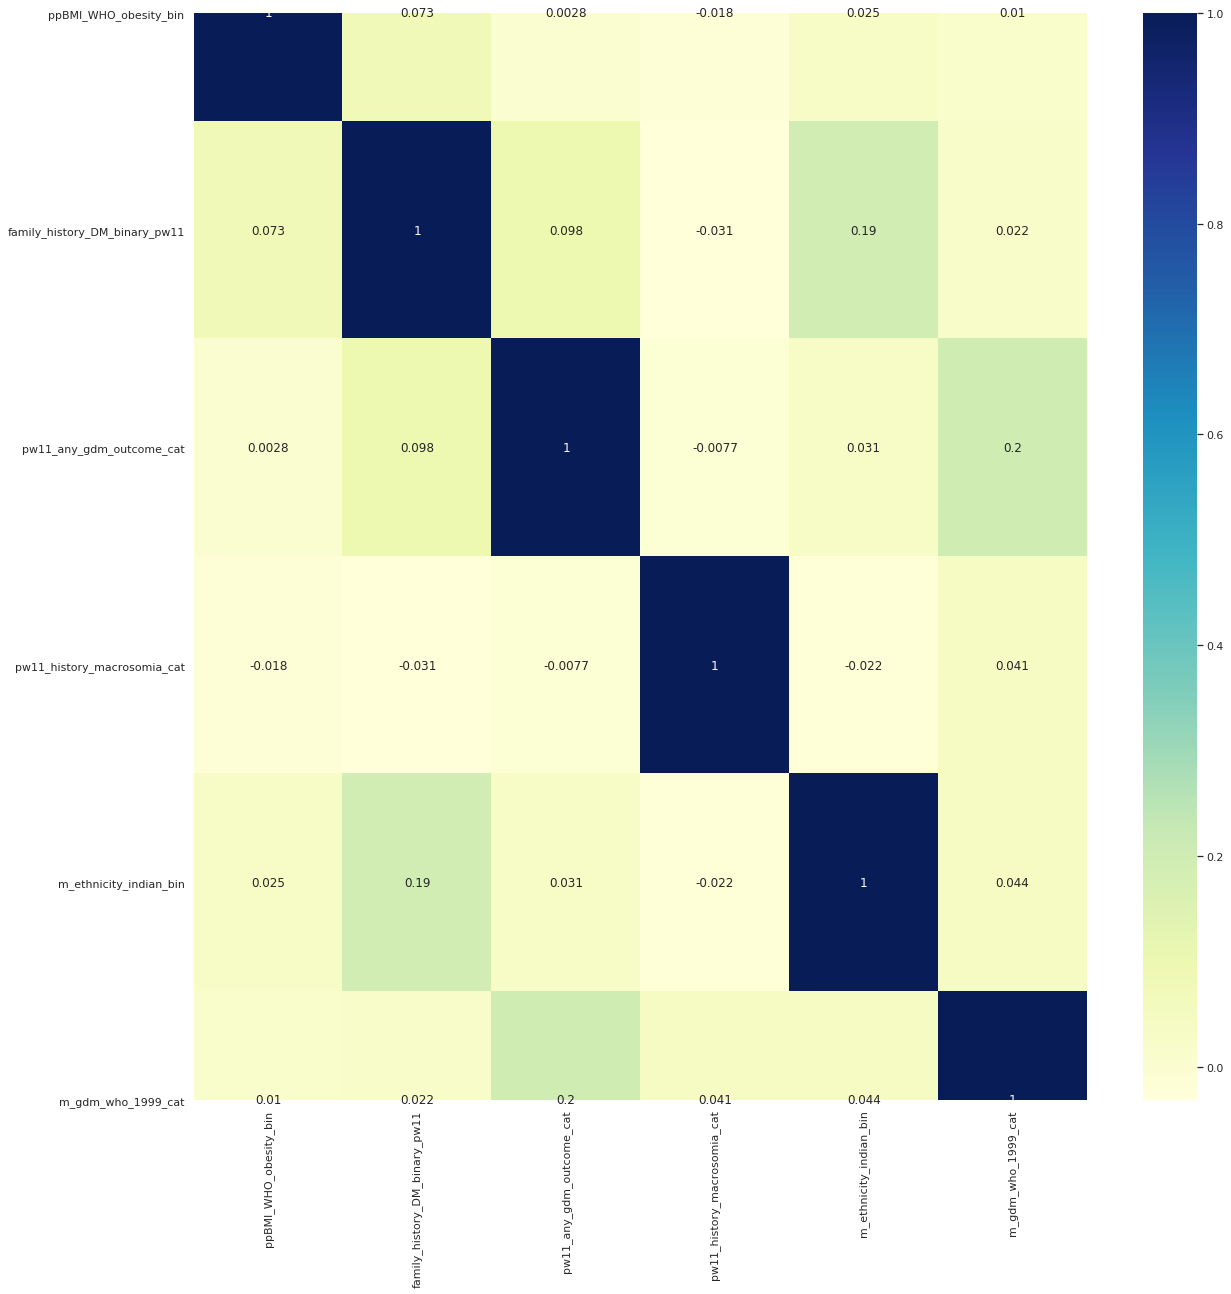

In [78]:
ax = sns.heatmap(df3.corr(method='spearman'), annot=True, cmap="YlGnBu")
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('heatmap_spearmancorr_nice', bbox_inches='tight', dpi=300)

Generating X & Y matrices

In [79]:
X=df3.loc[:, df3.columns != 'm_gdm_who_1999_cat']
y=df3.loc[:, df3.columns == 'm_gdm_who_1999_cat']

Create the Logistic Regressor classifier object

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

Create the grid search parameter grid

In [81]:
clf_param_grid = {
    'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'penalty': ["l2"],
    'solver': ["sag"]
}

In [82]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.10, random_state=0)
grid_nice_auc_lr = GridSearchCV(estimator=clf, param_grid=clf_param_grid, scoring='roc_auc', cv=sss, verbose=1, n_jobs=-1)

Fit the estimator

In [83]:
grid_nice_auc_lr.fit(MaxAbsScaler().fit_transform(X), y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished
/home/mukkesh/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                               10.0],
                         'penalty': ['l2'], 'solver': ['sag']},
             pre_dispatch='2*n_jobs', refit=True, return_trai

Compute metrics

In [84]:
AUC = grid_nice_auc_lr.best_score_

In [85]:
AUC

0.5854385964912281

In [86]:
print(grid_nice_auc_lr.best_params_)
print(grid_nice_auc_lr.best_estimator_)

{'C': 9.0, 'penalty': 'l2', 'solver': 'sag'}
LogisticRegression(C=9.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


In [87]:
std = grid_nice_auc_lr.cv_results_['std_test_score'][grid_nice_auc_lr.best_index_]

In [88]:
std

0.03260916981915124

In [89]:
print("AUC: %0.3f (+/- %0.3f)" % (AUC, std * 1.96))

AUC: 0.585 (+/- 0.064)


Save the best model as a 'Pickle' - saving the pickled model as a file

In [90]:
# Output a pickle file for the model
joblib.dump(grid_nice_auc_lr.best_estimator_, 'nice_auc_lr.pkl')

['nice_auc_lr.pkl']

Load the pickled model to make predictions on unseen data (in future)

In [91]:
nice_auc_lr = joblib.load('nice_auc_lr.pkl')

Interpreting machine learning model with logistic regression

Generating X & Y matrices

In [92]:
X_stat=df3.loc[:, df3.columns != 'm_gdm_who_1999_cat']
y_stat=df3.loc[:, df3.columns == 'm_gdm_who_1999_cat']

Implementing the model

In [93]:
import statsmodels.api as sm
X_stat = sm.add_constant(X_stat)
logit_model=sm.Logit(y_stat,X_stat)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.438121
         Iterations 6
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:    0.037     
Dependent Variable:      m_gdm_who_1999_cat    AIC:                 808.5037  
Date:                    2020-02-02 00:18      BIC:                 837.3778  
No. Observations:        909                   Log-Likelihood:      -398.25   
Df Model:                5                     LL-Null:             -413.56   
Df Residuals:            903                   LLR p-value:         1.1161e-05
Converged:               1.0000                Scale:               1.0000    
No. Iterations:          6.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                                   2.5%      97.5%        OR
const                          0.135376   0.215515  0.170809
ppBMI_WHO_obesity_bin          0.868526   3.009235  1.616663
family_history_DM_binary_pw11  0.657796   1.445571  0.975136
pw11_any_gdm_outcome_cat       3.733683  20.715212  8.794545
pw11_history_macrosomia_cat    0.362646  94.514432  5.854508
m_ethnicity_indian_bin         0.824981   2.029787  1.294039
